#  Preparing Data

In [289]:
import pandas as pd
from os import listdir
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [290]:
# Create dataframe with all 1 month Data
n = 0 # counter to grab only first header
for file in listdir("Data/1month/"):
    try: 
        dfa = pd.read_excel("Data/1month/" + file, sheet_name = 1)
        n += 1
        header = dfa.iloc[0]
        if n == 1:
            df = pd.DataFrame(columns = header)
        dfa = dfa[1:]
        dfa.columns = header
        df = pd.concat([dfa, df])
    except ValueError: # so non-excel files aren't grabbed
        pass

In [291]:
df

,Rk,Name,Team,Age,Pos,GP,G,A,P,PIM,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
1,151,Anton Lundell,FLA,21,F,13,1,7,8,4,...,0.077,0.538,0.615,33,3.0%,7,10,80,83,49.08%
2,152,Shane Pinto,OTT,22,F,11,6,1,7,2,...,0.545,0.091,0.636,23,26.1%,10,2,59,44,57.28%
3,153,Lawson Crouse,ARI,25,F,11,5,2,7,2,...,0.455,0.182,0.636,23,21.7%,30,5,1,2,33.33%
4,154,Charlie Coyle,BOS,30,F,13,5,2,7,6,...,0.385,0.154,0.538,25,20.0%,13,12,79,63,55.63%
5,155,Brad Marchand,BOS,34,F,5,4,3,7,0,...,0.8,0.6,1.4,17,23.5%,10,1,1,2,33.33%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,696,Logan Brown,STL,24,F,4,0,0,0,0,...,0,0,0,3,0.0%,3,2,4,14,22.22%
47,697,Connor Ingram,ARI,25,G,4,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,698,Vitaly Kravtsov,VAN,23,F,4,0,0,0,0,...,0,0,0,0,0.00%,3,1,0,0,0.00%
49,699,Arvid Söderblom,CHI,23,G,4,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
# Remove goalie entries
df = df[df.Pos != "G"]
# Remove unnecessary columns
df = df.drop(['Rk','Team'], axis=1)

In [293]:
# Convert time stats (e.g., 20:12) to seconds.
# Define function that does the string conversion:
def time2sec(time):
    m, s = time.split(':')
    return 60 * int(m) + int(s)

df['TOI'] = df['TOI'].apply(time2sec) 
df['ES'] = df['ES'].apply(time2sec) 
df['PP'] = df['PP'].apply(time2sec) 
df['SH'] = df['SH'].apply(time2sec) 

In [294]:
# Convert Position to boolean (0 = D, 1 = F)
def Pos2bool(pos):
    if pos == "D":
        return 0
    if pos == "F":
        return 1
        
df['Pos'] = df['Pos'].apply(Pos2bool)

In [295]:
# Remove '%' symbol from columns
def perc_rem(string):
    return string.replace('%','')

df['PPP%'] = df['PPP%'].apply(perc_rem)
df['FO%'] = df['FO%'].apply(perc_rem)
df['SH%'] = df['SH%'].apply(perc_rem)

In [296]:
df.set_index('Name')

,Age,Pos,GP,G,A,P,PIM,+/-,TOI,ES,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
Name,,,,,,,,,,,,,,,,,,,,,
Anton Lundell,21,1,13,1,7,8,4,6,1063,735,...,0.077,0.538,0.615,33,3.0,7,10,80,83,49.08
Shane Pinto,22,1,11,6,1,7,2,2,921,768,...,0.545,0.091,0.636,23,26.1,10,2,59,44,57.28
Lawson Crouse,25,1,11,5,2,7,2,-3,1045,756,...,0.455,0.182,0.636,23,21.7,30,5,1,2,33.33
Charlie Coyle,30,1,13,5,2,7,6,6,1060,785,...,0.385,0.154,0.538,25,20.0,13,12,79,63,55.63
Brad Marchand,34,1,5,4,3,7,0,2,1132,856,...,0.8,0.6,1.4,17,23.5,10,1,1,2,33.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jacob MacDonald,29,0,4,0,0,0,0,1,441,426,...,0,0,0,1,0.0,3,0,0,0,0.00
Kieffer Bellows,24,1,4,0,0,0,0,-2,682,624,...,0,0,0,2,0.0,10,1,1,0,100.00
Logan Brown,24,1,4,0,0,0,0,-2,604,559,...,0,0,0,3,0.0,3,2,4,14,22.22


In [297]:
# Create dataframe with season-end Data
m = 0 # counter to grab only first header
for file in listdir("Data/end/"):
    try: 
        dfa = pd.read_excel("Data/end/" + file, sheet_name = 1)
        m += 1
        header = dfa.iloc[0]
        if m == 1:
            dfend = pd.DataFrame(columns = header)
        dfa = dfa[1:]
        dfa.columns = header
        dfend = pd.concat([dfa, dfend])
    except ValueError: # so non-excel files aren't grabbed
        pass

In [298]:
# Keep only name and points total
dfend = dfend[['Name', 'P']]
dfend = dfend.rename(columns={'P': 'Pend'})
dfend.set_index('Name')

,Pend
Name,
Kyle Palmieri,33
Kevin Labanc,33
Anton Lundell,33
Sonny Milano,33
John Klingberg,33
...,...
Viktor Arvidsson,59
Roman Josi,59
Casey Mittelstadt,59


In [299]:
#Join the two datasets
df = df.set_index('Name').join(dfend.set_index('Name'))

In [300]:
#Remove rows where Pend is less than 10
df = df[df.Pend > 9]

# Exploratory Data Analysis

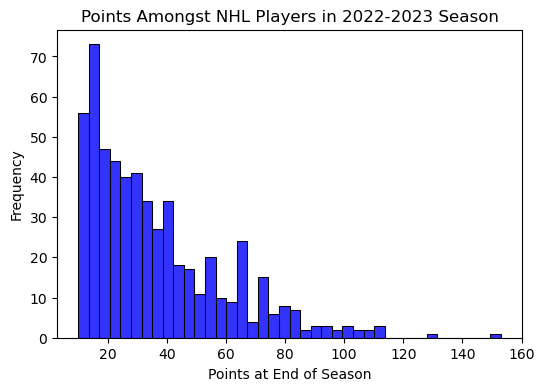

In [301]:
plt.figure(figsize=(6, 4))

sns.histplot(df.Pend, bins=40, color='blue', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Points at End of Season')
plt.title('Points Amongst NHL Players in 2022-2023 Season')

plt.show()

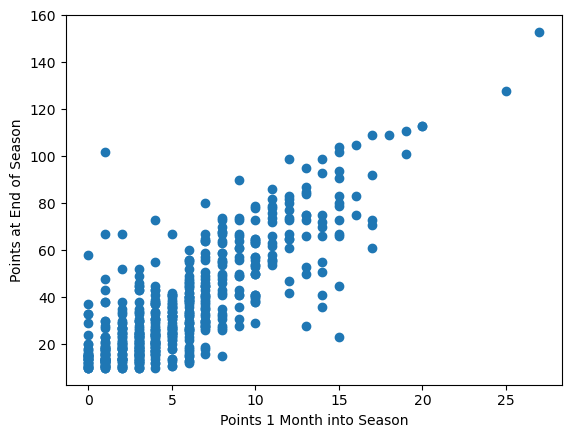

In [302]:
plt.scatter(df.P, df.Pend)

plt.ylabel('Points at End of Season')
plt.xlabel('Points 1 Month into Season')
plt.show()

# Split Data

In [303]:
# Convert all data to numerical values
for col in list(df.columns):
    df[col] = pd.to_numeric(df[col])

In [304]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [305]:
n, n_val + n_test + n_train

(567, 567)

In [306]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [307]:
y_train = df_train.Pend
y_val = df_val.Pend
y_test = df_test.Pend

del df_train['Pend']
del df_val['Pend']
del df_test['Pend']

# Linear Regression

In [308]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Try Regressing

In [309]:
base = list(df_train.columns)

In [310]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [311]:
X_train = prepare_X(df_train)

In [312]:
w_0, w = train_linear_regression(X_train, y_train)

In [313]:
y_train_pred = w_0 + X_train.dot(w)


X_val = prepare_X(df_val)
y_val_pred = w_0 + X_val.dot(w)

## Evaluate Accuracy

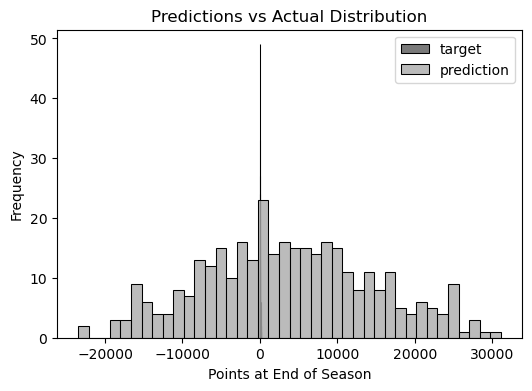

In [314]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Points at End of Season')
plt.title('Predictions vs Actual Distribution')

plt.show()

In [315]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def mae(y, y_pred):
    error = abs(y_pred - y)
    return error.mean()

In [316]:
print('train:', '\n rmse =', rmse(y_train, y_train_pred), '\n mae = ', mae(y_train, y_train_pred))
print('validation:', '\n rmse =', rmse(y_val, y_val_pred), '\n mae = ', mae(y_val, y_val_pred))

train: 
 rmse = 11623.4704895972 
 mae =  9314.40960106405
validation: 
 rmse = 13098.983053849748 
 mae =  10632.734276567366


# Regularization

In [317]:
# The columns of df are not linearly independent (e.g., P = G + A), so we have to regularize.

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [318]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
y_train_pred = w_0 + X_train.dot(w)


X_val = prepare_X(df_val)
y_val_pred = w_0 + X_val.dot(w)

In [319]:
print('train:', '\n rmse =', rmse(y_train, y_train_pred), '\n mae = ', mae(y_train, y_train_pred))
print('validation:', '\n rmse =', rmse(y_val, y_val_pred), '\n mae = ', mae(y_val, y_val_pred))

train: 
 rmse = 10.389254455054724 
 mae =  7.8026921110992795
validation: 
 rmse = 11.705346278584923 
 mae =  8.466236535352138


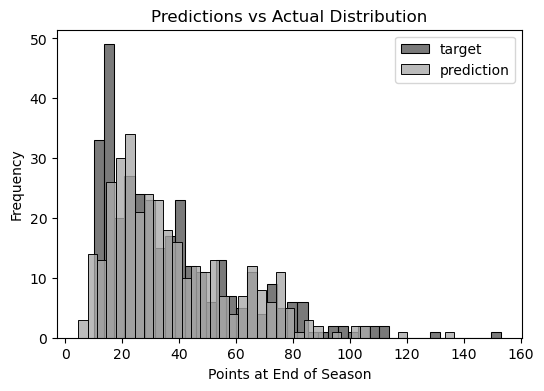

In [320]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Points at End of Season')
plt.title('Predictions vs Actual Distribution')

plt.show()

## Use the model to predict

In [321]:
df_test.reset_index()

,Name,Age,Pos,GP,G,A,P,PIM,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,Drew Doughty,33,0,14,1,5,6,12,0,1598,...,0.071,0.357,0.429,28,3.6,21,17,0,0,0.00
1,Brent Burns,37,0,12,2,7,9,8,-2,1410,...,0.167,0.583,0.750,51,3.9,6,8,0,0,0.00
2,Paul Stastny,37,1,12,0,4,4,10,0,734,...,0.000,0.333,0.333,7,0.0,7,0,29,19,60.42
3,Vladislav Gavrikov,27,0,12,1,1,2,6,-4,1274,...,0.083,0.083,0.167,14,7.1,17,20,0,0,0.00
4,Noah Dobson,22,0,13,4,5,9,2,1,1223,...,0.308,0.385,0.692,33,12.1,8,18,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,J.J. Moser,22,0,11,1,4,5,6,-6,1397,...,0.091,0.364,0.455,11,9.1,10,25,0,0,0.00
109,Craig Smith,33,1,8,1,2,3,2,2,668,...,0.125,0.250,0.375,11,9.1,9,3,0,1,0.00
110,Kirby Dach,21,1,12,2,8,10,8,1,917,...,0.167,0.667,0.833,18,11.1,7,4,18,30,37.50
111,Braden Schneider,21,0,13,0,1,1,5,-2,863,...,0.000,0.077,0.077,11,0.0,22,16,0,0,0.00


In [322]:
i = 110
guy = df_test.iloc[i].to_dict()

In [323]:
X_test = prepare_X(pd.DataFrame([guy]))[0]
y_pred = w_0 + X_test.dot(w)
y_pred

41.87225920057279

In [324]:
y_test

Name
Drew Doughty          52
Brent Burns           61
Paul Stastny          22
Vladislav Gavrikov    19
Noah Dobson           49
                      ..
J.J. Moser            31
Craig Smith           16
Kirby Dach            38
Braden Schneider      18
Brett Ritchie         13
Name: Pend, Length: 113, dtype: int64

## Decision Tree Regression

In [325]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

In [326]:
# Train and Find Optimal Parameters
score = 1000000
for d in range(1,10):
    for l in range(1,10):
        train_dicts = df_train.fillna(0).to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dicts)

        dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf = l)
        dt.fit(X_train, y_train)

        val_dicts = df_val.fillna(0).to_dict(orient='records')
        X_val = dv.transform(val_dicts)

        y_train_pred = dt.predict(X_train)
        y_val_pred = dt.predict(X_val)
        
        if rmse(y_val, y_val_pred) < score:
            score = rmse(y_val, y_val_pred)
            dbest, lbest = d, l

        #print('%4s %4s -> %.3f' % (d, l, rmse(y_val, y_val_pred)))
        #print('train:', '\n rmse =', rmse(y_train, y_train_pred), '\n mae = ', mae(y_train, y_train_pred))
        #print('validation:', '\n rmse =', rmse(y_val, y_val_pred), '\n mae = ', mae(y_val, y_val_pred))
        
# Finalize model with best parameters      
dt = DecisionTreeRegressor(max_depth=dbest, min_samples_leaf = lbest)
dt.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_train_pred_dt = dt.predict(X_train)
y_val_pred_dt = dt.predict(X_val)

In [327]:
dbest,lbest

(5, 9)

In [328]:
print('train:', '\n rmse =', rmse(y_train, y_train_pred_dt), '\n mae = ', mae(y_train, y_train_pred_dt))
print('validation:', '\n rmse =', rmse(y_val, y_val_pred_dt), '\n mae = ', mae(y_val, y_val_pred_dt))

train: 
 rmse = 10.767384655731632 
 mae =  7.6956879902260065
validation: 
 rmse = 12.128271769165403 
 mae =  8.901785474455098


## Averaging Linear and Decision Tree Regressions

In [329]:
wscore = 10**6
for w in np.linspace(0,1,10000):
    y_train_pred_total = w*y_train_pred + (1-w)*y_train_pred_dt
    y_val_pred_total = w*y_val_pred + (1-w)*y_val_pred_dt
    #print('%.2f -> %.3f' % (w, rmse(y_val, y_val_pred_total)))
    if rmse(y_val, y_val_pred_total) < wscore:
        wscore = rmse(y_val, y_val_pred_total)
        wbest = w
    #print('train:', '\n rmse =', rmse(y_train, y_train_pred_total), '\n mae = ', mae(y_train, y_train_pred_total))
    #print('validation:', '\n rmse =', rmse(y_val, y_val_pred_total), '\n mae = ', mae(y_val, y_val_pred_total))

In [330]:
wbest

0.11821182118211822

In [331]:
print('train:', '\n rmse =', rmse(y_train, y_train_pred_total), '\n mae = ', mae(y_train, y_train_pred_total))
print('validation:', '\n rmse =', rmse(y_val, y_val_pred_total), '\n mae = ', mae(y_val, y_val_pred_total))

train: 
 rmse = 10.355813058697631 
 mae =  7.169025787621621
validation: 
 rmse = 12.355156058193403 
 mae =  8.854814509193737


## Random Forest

In [332]:
from sklearn.ensemble import RandomForestRegressor

In [438]:
scores = []
scorebest = 10**6
for e in range(500,1500,50):
    rf = RandomForestRegressor(n_estimators=e, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_train_pred_rf = rf.predict(X_train)
    y_val_pred_rf = rf.predict(X_val)
    score_e = rmse(y_val, y_val_pred_rf)
    scores.append([e,score_e])
    if score_e < scorebest:
        scorebest = score_e
        ebest = e

In [439]:
dfscores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

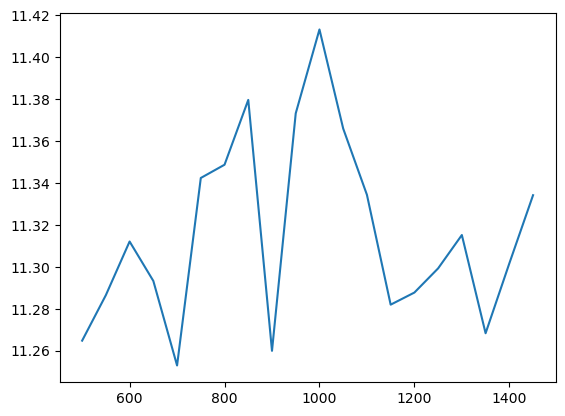

In [440]:
plt.plot(dfscores.n_estimators, dfscores.rmse)

In [441]:
rf = RandomForestRegressor(n_estimators=ebest)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_val_pred_rf = rf.predict(X_val)

In [442]:
print('validation:', '\n rmse =', rmse(y_val, y_val_pred_rf), '\n mae = ', mae(y_val, y_val_pred_rf))

validation: 
 rmse = 11.36929694550367 
 mae =  8.356773704171937


In [443]:
ebest

700

In [444]:
scores = []

for d in [5, 10, 15]:
    for n in range(500,700,50):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)

        scores.append((d, n, score))

In [417]:
columns = ['max_depth', 'n_estimators', 'score']
df_scores = pd.DataFrame(scores, columns=columns)

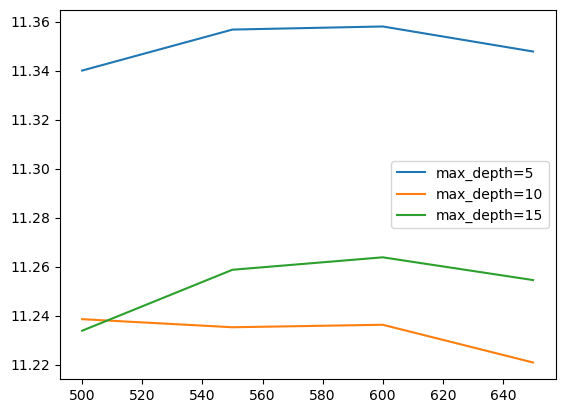

In [418]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.score,
             label='max_depth=%d' % d)

plt.legend()

In [419]:
max_depth = 10

In [421]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(500, 700, 50):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)

        scores.append((s, n, score))

In [422]:
columns = ['min_samples_leaf', 'n_estimators', 'score']
df_scores = pd.DataFrame(scores, columns=columns)

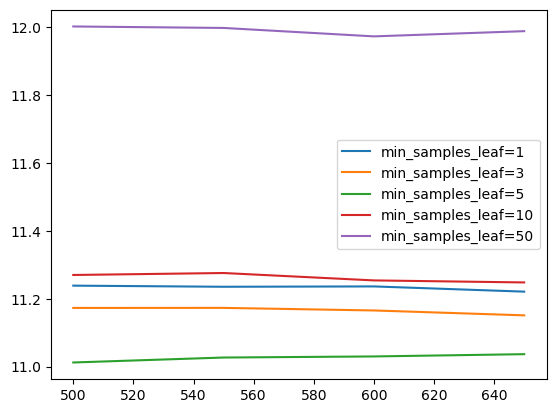

In [424]:
values = [1, 3, 5, 10, 50]

for s in values:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.score,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [425]:
min_samples_leaf = 3

In [427]:
rf = RandomForestRegressor(n_estimators=500,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=500,
                      random_state=1)

In [429]:
y_val_pred_rf = rf.predict(X_val)
print('validation:', '\n rmse =', rmse(y_val, y_val_pred_rf), '\n mae = ', mae(y_val, y_val_pred_rf))

validation: 
 rmse = 11.172863672922775 
 mae =  8.164023688947795


## Gradient Boosting